In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

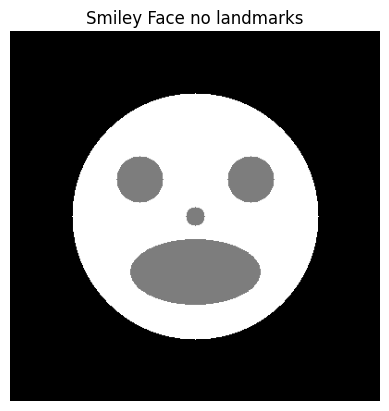

In [2]:
size = 400
center = (size // 2, size // 2)

def make_smiley_face(size):
  image = np.zeros((size, size, 3), dtype=np.uint8)
  image = cv2.circle(image, center, size // 3, (255, 255, 255), -1)
  image = cv2.circle(image, center=(int(center[0] - size * 0.15), int(center[1] - size * 0.1)), radius=25, color=(125, 125, 125), thickness=-1)
  image = cv2.circle(image, center=(int(center[0] + size * 0.15), int(center[1] - size * 0.1)), radius=25, color=(125, 125, 125), thickness=-1)
  image = cv2.circle(image, center=(int(center[0]), int(center[1])), radius=10, color=(125, 125, 125), thickness=-1)
  image = cv2.ellipse(image, (int(center[0]), int(center[1] + size * 0.1)), (70, 35), 0, 0, 180, (125, 125, 125), -1)
  return image



# Generate smiley face image
image = make_smiley_face(size)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Smiley Face no landmarks')
plt.axis('off')
plt.show()

In [13]:
# Function to add landmarks to the smiley face image
def add_landmarks(image, center, size, point):
    # Define landmark points (e.g., for eyes, nose, and mouth)
    # Example: For a simple smiley face, you might define landmarks for eyes, nose, and mouth
    landmarks = {
        'left_eye': (int(center[0] - size * 0.15), int(center[1] - size * 0.1)),
        'right_eye': (int(center[0] + size * 0.15), int(center[1] - size * 0.1)),
        
        'nose': (int(center[0]), int(center[1])),
        
        'mouth_left_top_top': (int(center[0] - size * 0.15), int(center[1] + size *0.11)),
        'mouth_left_top': (int(center[0] - size * 0.1), int(center[1] + size * 0.14)),
        'mouth_top': (int(center[0] - size * 0.05), int(center[1] + size * 0.15)),
        'mouth_middle': (int(center[0] ), int(center[1] + size * 0.15)),
        'mouth_bottom': (int(center[0] + size * 0.05), int(center[1] + size * 0.15)),
        'mouth_right_bottom': (int(center[0] + size * 0.1), int(center[1] + size * 0.14)),
        'mouth_right_bottom_bottom': (int(center[0] + size * 0.15), int(center[1] + size * 0.11))
    }

    # Add points along the perimeter of the circle
    perimeter_points = []
    for angle in range(0, 360, point):  # Adjust the step size as needed
        x = int(center[0] + (size // 3) * np.cos(np.deg2rad(angle)))
        y = int(center[1] + (size // 3) * np.sin(np.deg2rad(angle)))
        perimeter_points.append((x, y))

    # Add perimeter points to landmarks
    for i, point in enumerate(perimeter_points):
        landmarks[f'perimeter_{i}'] = point
        cv2.putText(image, str(i), (point[0] + 5, point[1] + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        

    # Draw  landmarks on the image
    for landmark, (x, y) in landmarks.items():
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

    return image, landmarks




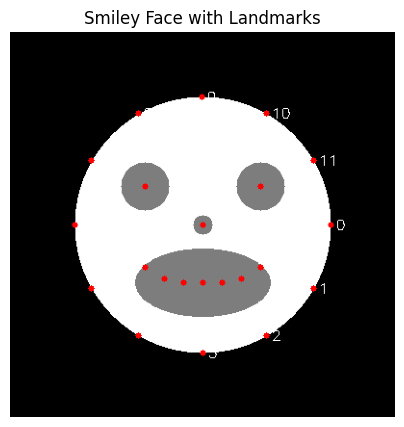

In [14]:
# Add landmarks to the smiley face image
smiley_face_with_landmarks, landmarks = add_landmarks(image, center, size, 30)


# Display the smiley face image with landmarks and mask using matplotlib

# figsize 
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(smiley_face_with_landmarks, cv2.COLOR_BGR2RGB))
plt.title('Smiley Face with Landmarks')
plt.axis('off')

plt.show()